In [204]:
## import all the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

# Ignore warnings
warnings.filterwarnings('ignore')

#reading the data from loan file
loan_info = pd.read_csv("loan.csv")

loan_info.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [108]:
loan_info.shape

(39717, 111)

In [205]:
# We have considered all the the Customer and Loan realted fields. We have also removed the the fields that that are created 
# after a loan application has been approved as we are trying to see which loan applications are risky. 

columns_required = ['loan_amnt',
'funded_amnt',
'funded_amnt_inv',
'term',
'int_rate',
'installment',
'grade',
'sub_grade',
'emp_title',
'emp_length',
'home_ownership',
'annual_inc',
'verification_status',
'issue_d',
'loan_status',
'url',
'desc',
'purpose',
'title',
'zip_code',	
'addr_state',	
'dti',
'addr_state',
'purpose',
'loan_amnt',
'funded_amnt',
'funded_amnt_inv',
'dti',
'term'
];

column = [x for x in loan_info.columns if x not in columns_required]

for col in column:
    loan_info = loan_info.drop(col, axis=1)
loan_info

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,...,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33
39713,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,...,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40
39714,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,...,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30
39715,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,...,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72


In [54]:
loan_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   funded_amnt_inv      39717 non-null  float64
 3   term                 39717 non-null  object 
 4   int_rate             39717 non-null  object 
 5   installment          39717 non-null  float64
 6   grade                39717 non-null  object 
 7   sub_grade            39717 non-null  object 
 8   emp_length           38642 non-null  object 
 9   home_ownership       39717 non-null  object 
 10  annual_inc           39717 non-null  float64
 11  verification_status  39717 non-null  object 
 12  issue_d              39717 non-null  object 
 13  loan_status          39717 non-null  object 
 14  purpose              39717 non-null  object 
 15  addr_state           39717 non-null 

In [206]:
# We will be dropping rows with loan status "Current" because it does not does not give any information 
# that will help in our analysis for approving or rejecting of application

loan_info = loan_info[~(loan_info['loan_status'] == 'Current')]
loan_info.shape


(38577, 22)

In [207]:
# Data Cleanup Activities

#Filtering the rows where emp_length is blank
loan_info.dropna(subset = ["emp_length"], inplace=True)

# Extract number from emp-length and update in dataset
loan_info = loan_info.assign(emp_length = lambda x: x['emp_length'].str.extract('(\d+)'))

#Take out % from int_rate
loan_info['int_rate'] = loan_info['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

# Extract number from term and update in dataset
loan_info = loan_info.assign(term = lambda x: x['term'].str.extract('(\d+)'))

# Extract xx from zip_code and update in dataset
loan_info['zip_code'] = loan_info['zip_code'].apply(lambda x: pd.to_numeric(x.split("x")[0]))

# Make Verification Status column as Verified and Source Verified into one value as Verified and all other values as Not Verified.
loan_info['verification_status']= loan_info['verification_status'].apply(lambda x :'Verified' if (x=='Verified' or x == 'Source Verified')  else 'Not Verified')

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
loan_info['int_rate_cats'] = pd.cut(loan_info['int_rate'],[0, 10, 12.5, 16, 20, 27], labels=['0-10', '10-12.5', '12.5-20', '20-25','26-30'])


# categorise dti  into buckets which will help in analysis further in bivariate analysis.
loan_info['dti_cats'] = pd.cut(loan_info['dti'],[0, 10, 12.5, 16, 20, 30], labels=['0-10', '10-12.5', '12.5-20', '20-25','26-30'])


loan_info



,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,int_rate_cats,dti_cats
0,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10,...,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860,AZ,27.65,10-12.5,26-30
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,1,...,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309,GA,1.00,12.5-20,0-10
2,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10,...,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606,IL,8.72,12.5-20,0-10
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,...,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917,CA,20.00,12.5-20,20-25
5,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3,...,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852,AZ,11.20,0-10,10-12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36,8.07,78.42,A,A4,FiSite Research,4,...,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802,CO,11.33,0-10,10-12.5
39713,8500,8500,875.0,36,10.28,275.38,C,C1,"Squarewave Solutions, Ltd.",3,...,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274,NC,6.40,10-12.5,0-10
39714,5000,5000,1325.0,36,8.07,156.84,A,A4,NaN,1,...,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,17,MA,2.30,0-10,0-10
39715,5000,5000,650.0,36,7.43,155.38,A,A2,NaN,1,...,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208,MD,3.72,0-10,0-10


Before  Removal of Outliers :
count    37544.000000
mean        11.963319
std          3.683012
min          5.420000
25%          8.940000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64


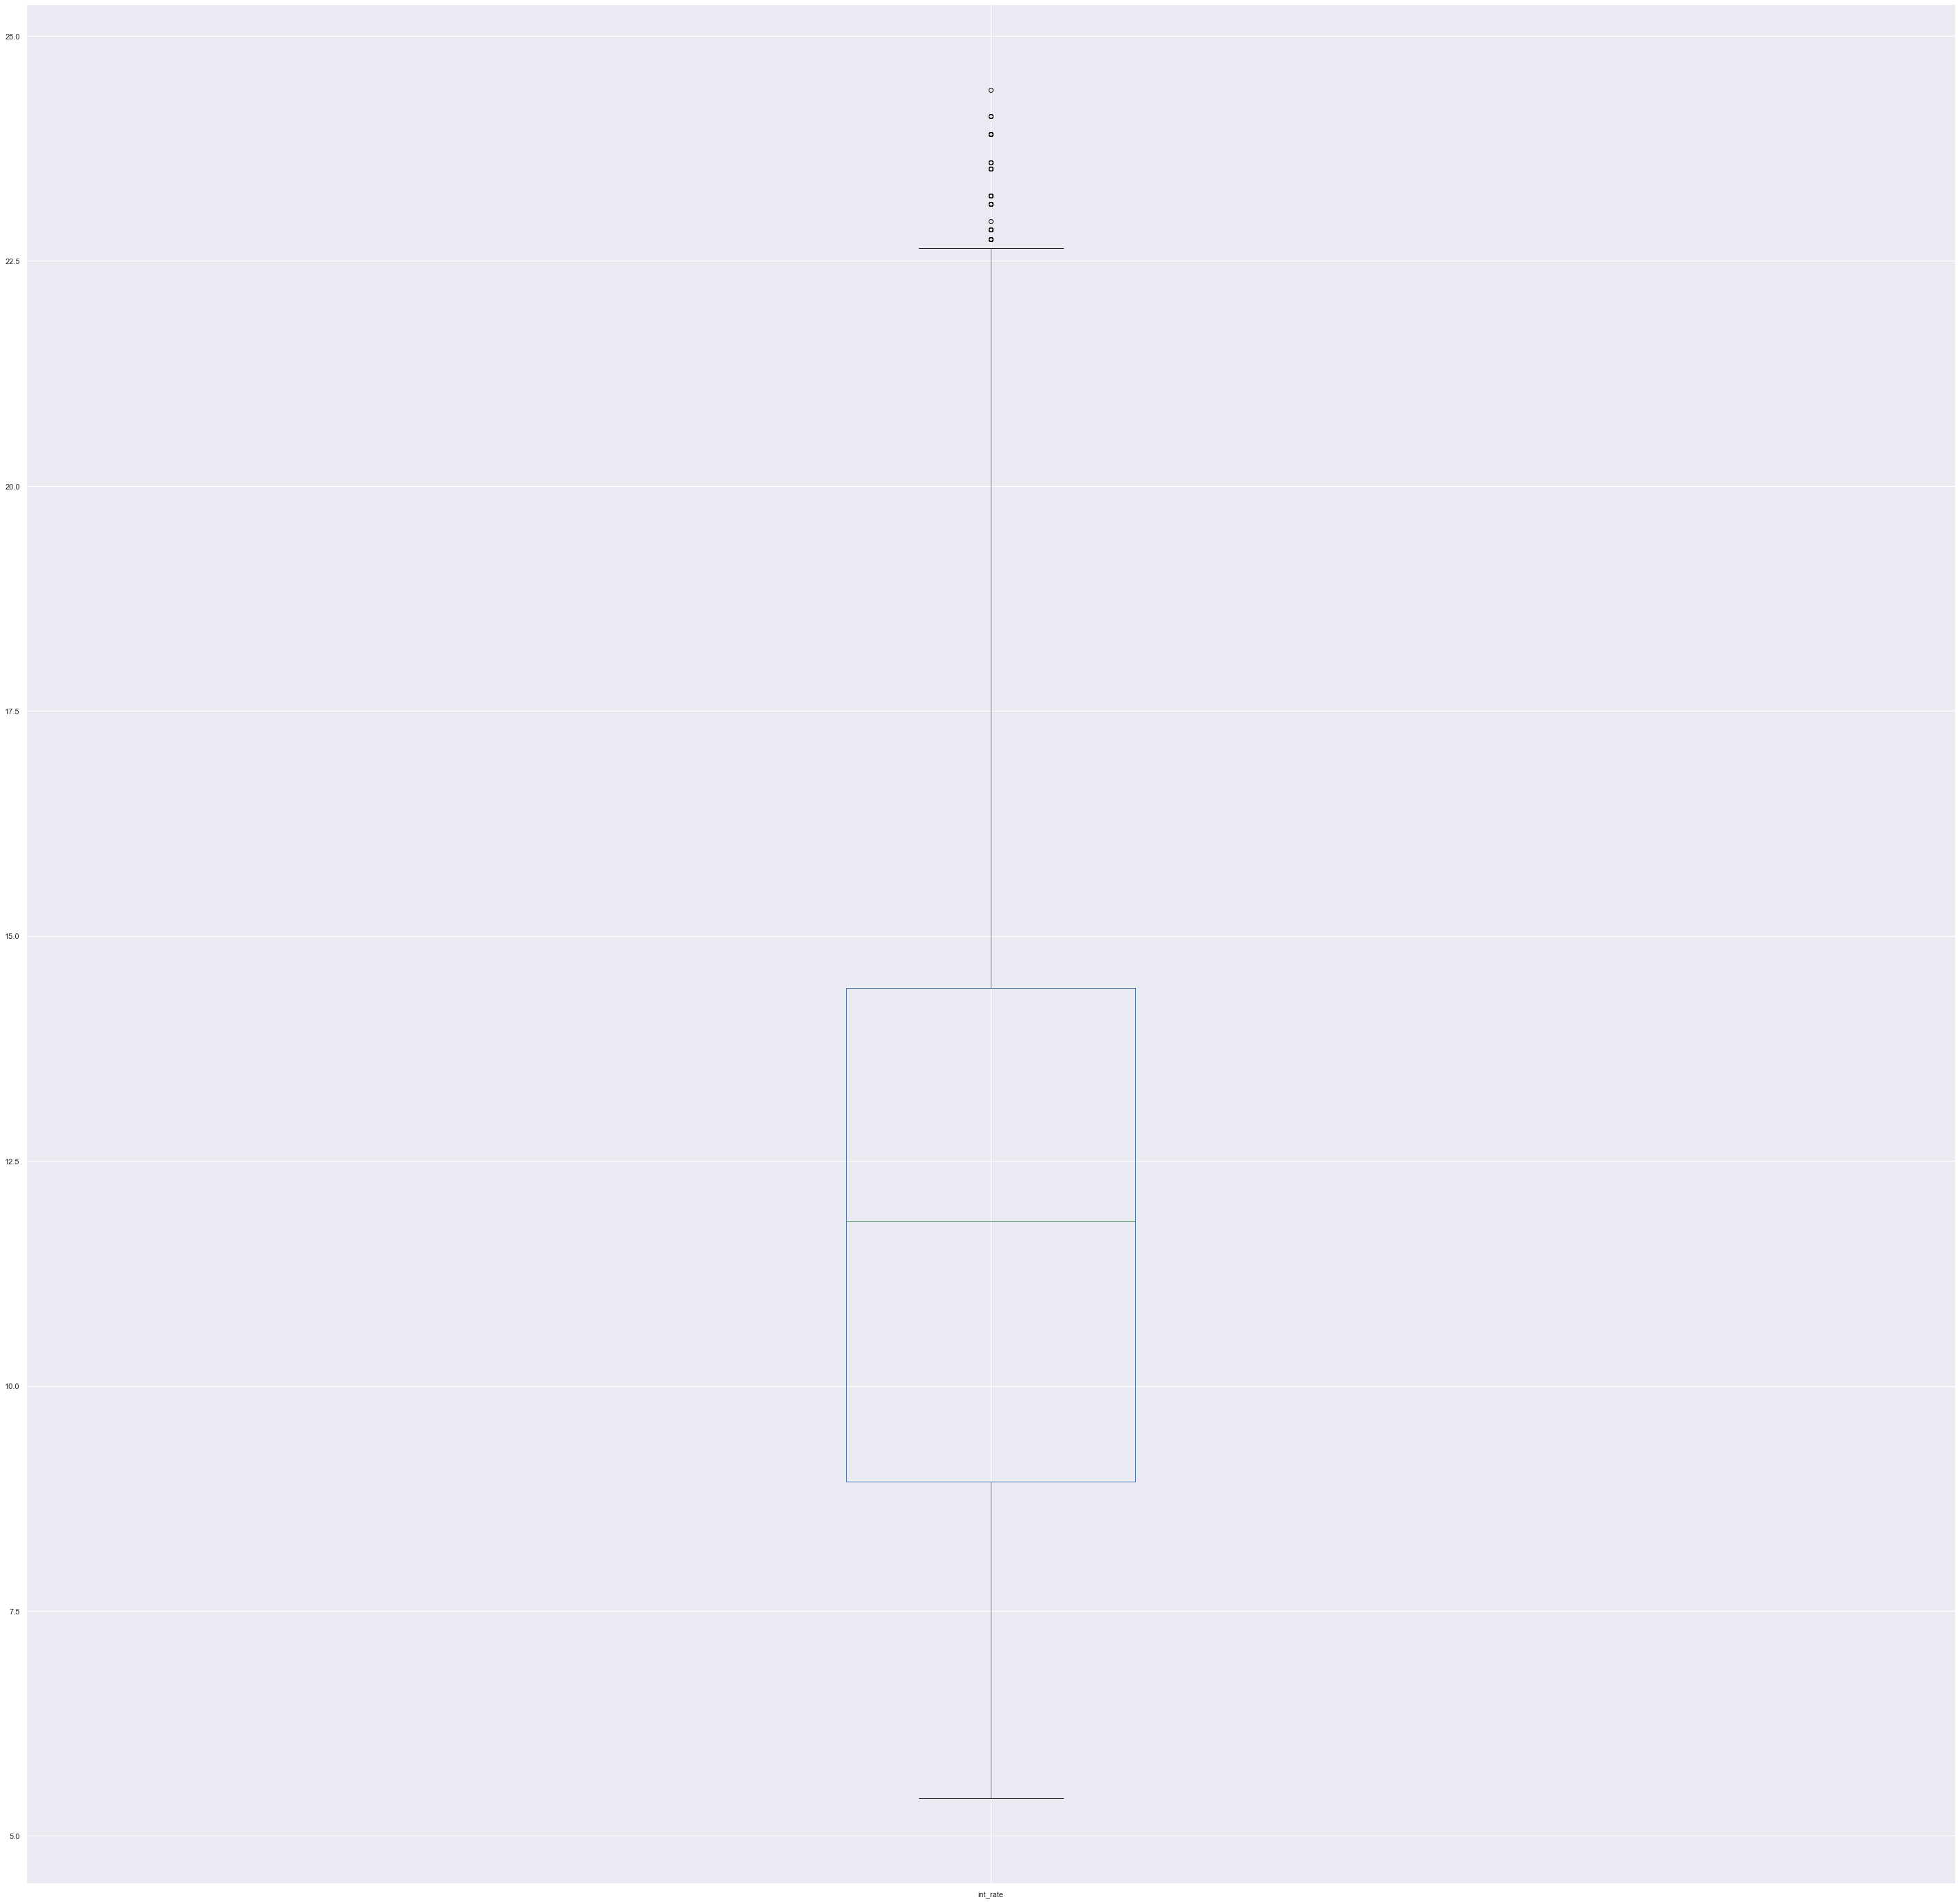

In [208]:
#Univariant Analysis
# Boxplot is showing outliar values which we need to analyze while during analysis
loan_info['int_rate'].plot.box()

print('Before  Removal of Outliers :')
print(loan_info["int_rate"].describe())

After  Removal of Outliers :
count    37164.000000
mean        11.861822
std          3.560823
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         20.900000
Name: int_rate, dtype: float64


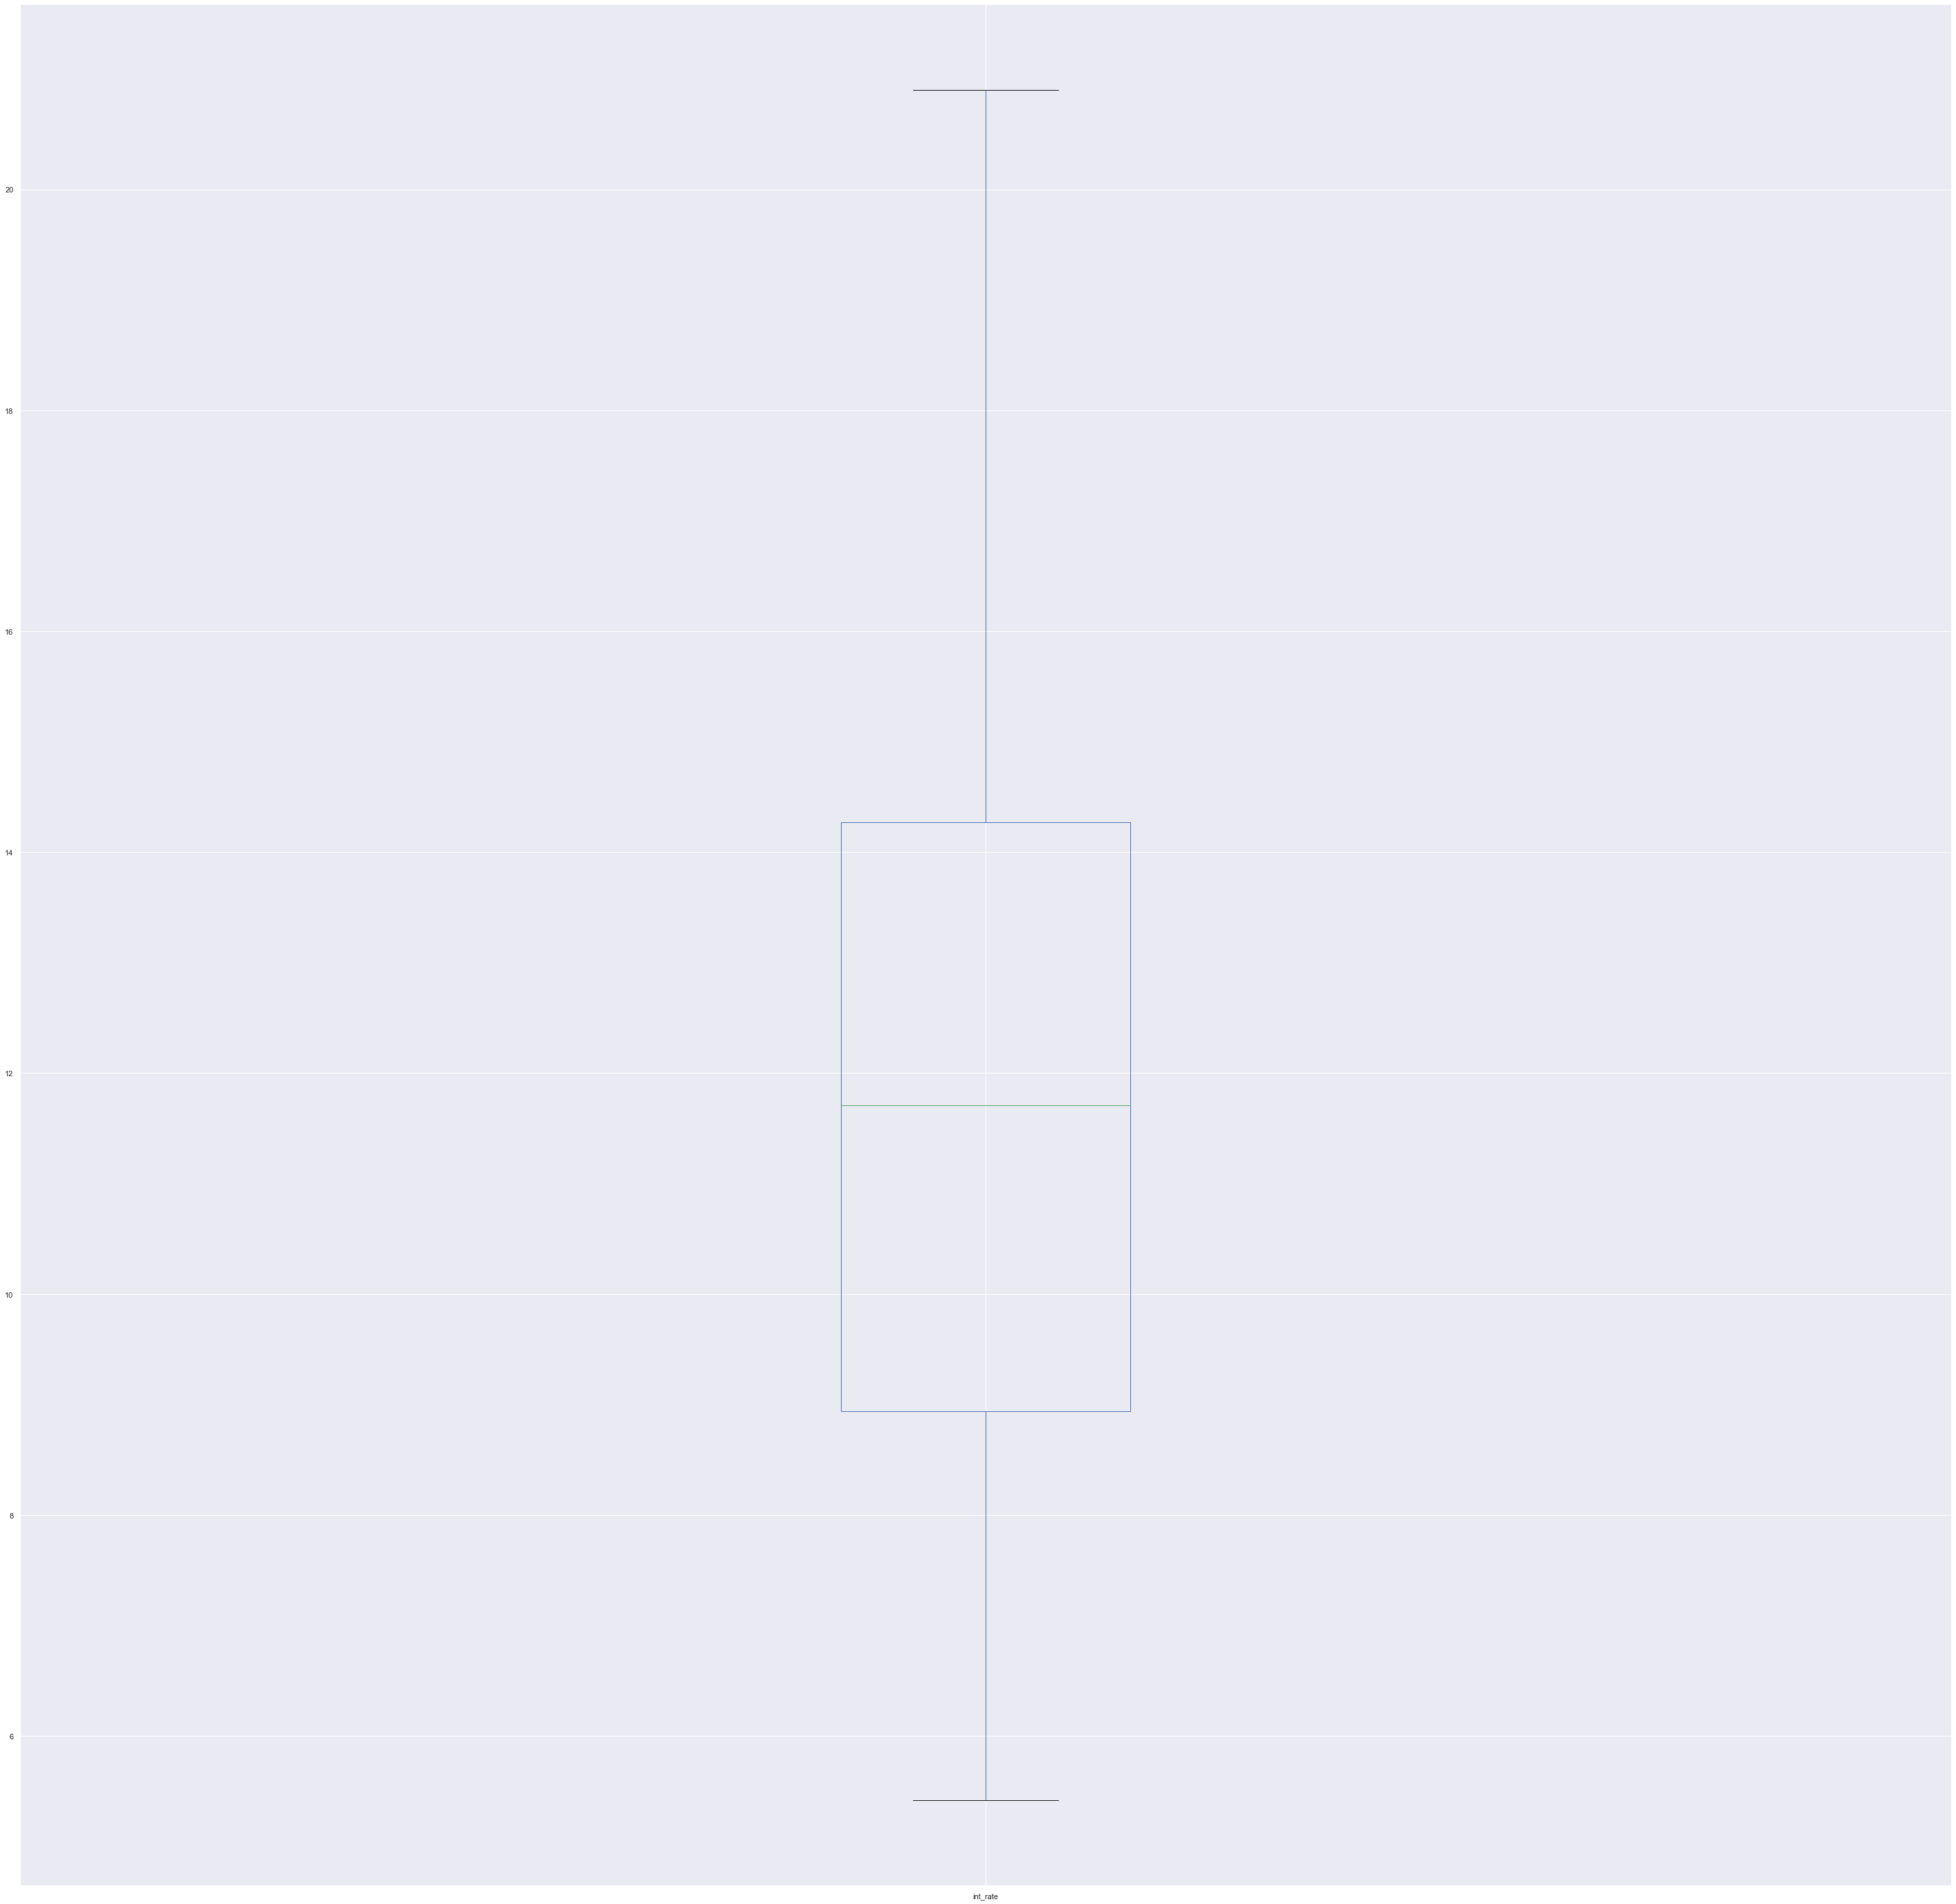

In [209]:
# Remove Outliers quantile .99 from int_rates

loan_info = loan_info[loan_info["int_rate"] < loan_info["int_rate"].quantile(0.99)]
loan_info['int_rate'].plot.box()

print('After  Removal of Outliers :')
print(loan_info["int_rate"].describe())

Before  Removal of Outliers :
count    3.716400e+04
mean     6.912548e+04
std      6.455407e+04
min      4.000000e+03
25%      4.100000e+04
50%      5.970000e+04
75%      8.250000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


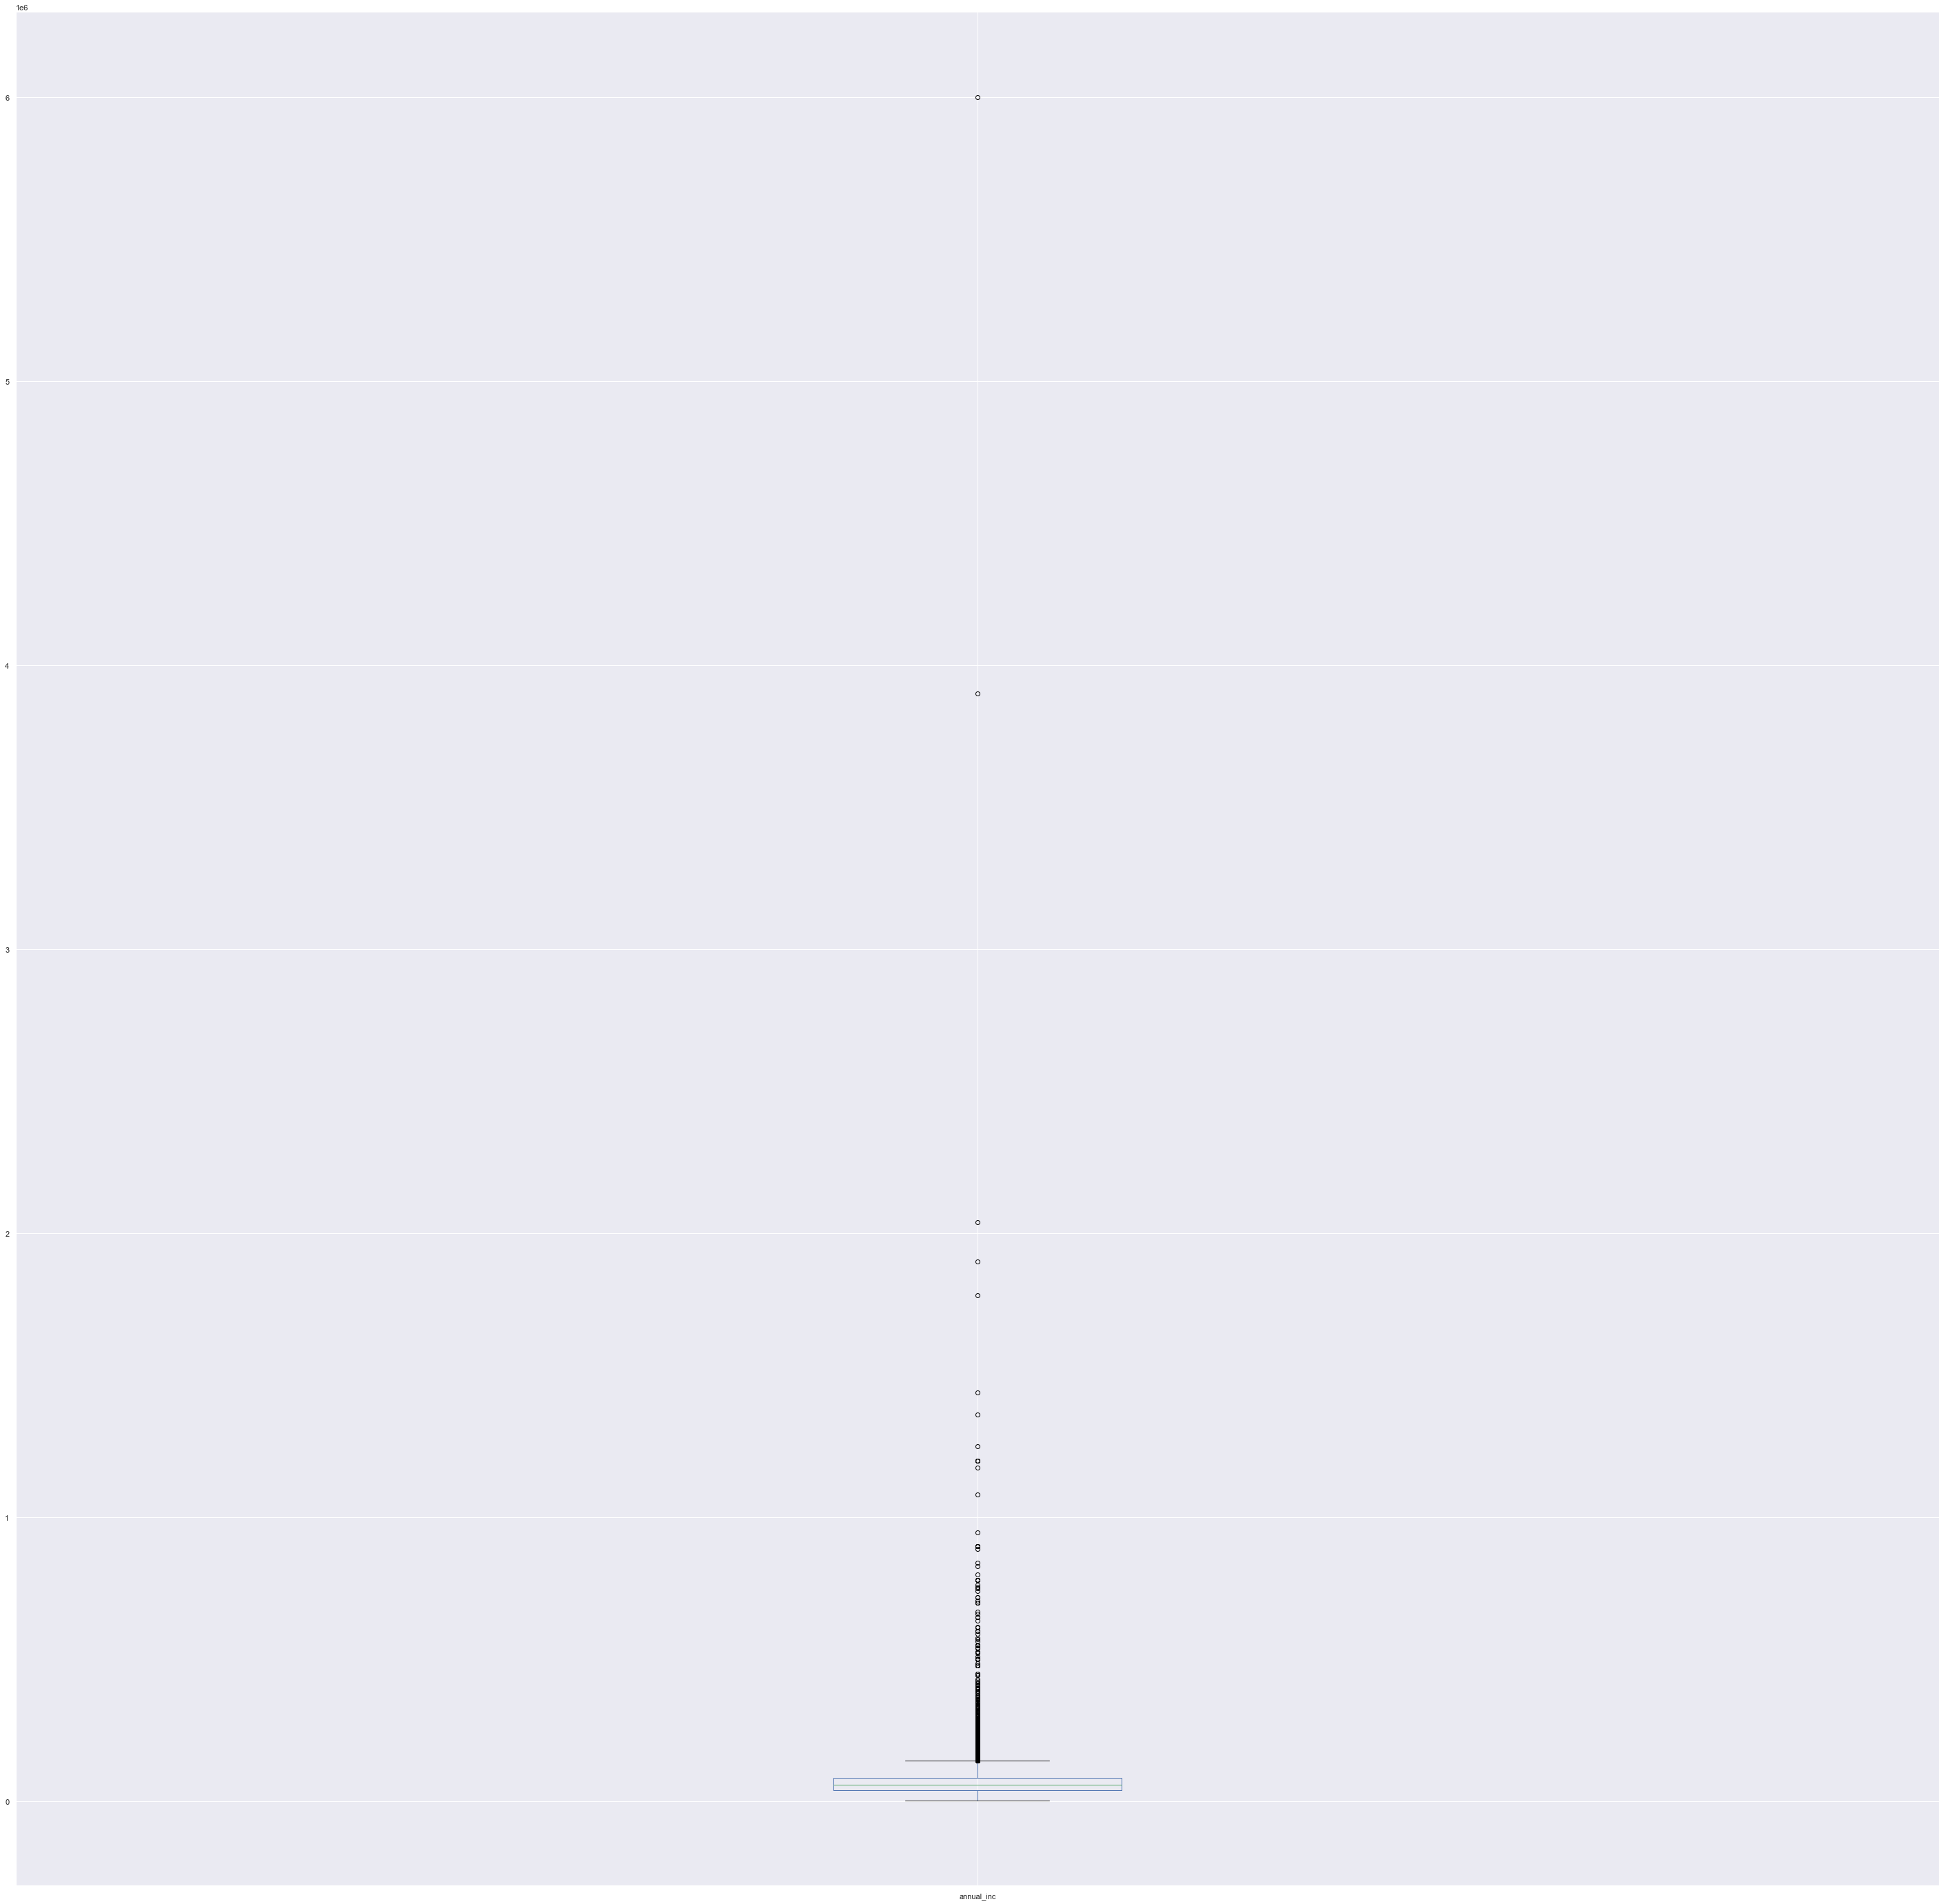

In [210]:
# Boxplot is showing outliar values in annual income which we need to analyze while during further analysis
loan_info['annual_inc'].plot.box()
print('Before  Removal of Outliers :')
print(loan_info["annual_inc"].describe())

After Removal of Outliers :
count     36792.00000
mean      65664.18547
std       34917.95486
min        4000.00000
25%       40800.00000
50%       58800.00000
75%       81000.00000
max      230004.00000
Name: annual_inc, dtype: float64


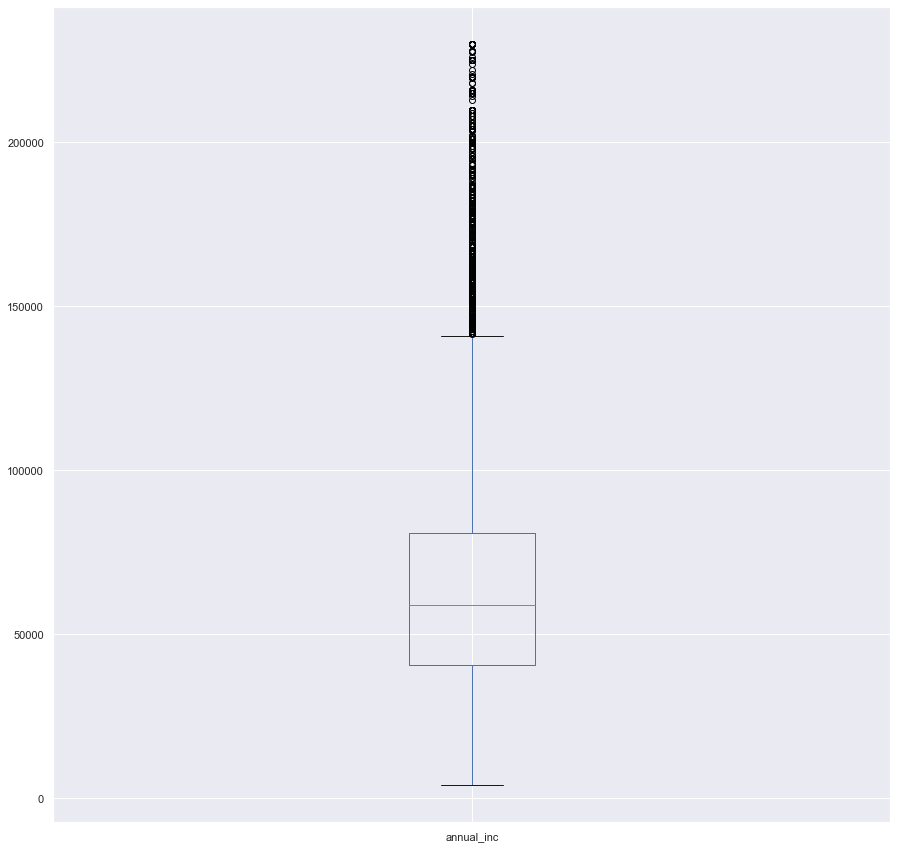

In [47]:
# Remove Outliers quantile .99 from annual_inc

loan_info = loan_info[loan_info["annual_inc"] < loan_info["annual_inc"].quantile(0.99)]
loan_info['annual_inc'].plot.box()

print('After Removal of Outliers :')
print(loan_info["annual_inc"].describe())

In [211]:
# Derived columns
# We are going to create derived cloumns for month and year columns separately that we are going to use for analysis

loan_info.issue_d = pd.to_datetime(loan_info.issue_d, format='%b-%y')
loan_info['year']=loan_info['issue_d'].dt.year
loan_info['month']=loan_info['issue_d'].dt.month

loan_info.head(50)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,desc,purpose,title,zip_code,addr_state,dti,int_rate_cats,dti_cats,year,month
0,5000,5000,4975.00000,36,10.65,162.87,B,B2,NaN,10,...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860,AZ,27.65,10-12.5,26-30,2011,12
1,2500,2500,2500.00000,60,15.27,59.83,C,C4,Ryder,1,...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309,GA,1.00,12.5-20,0-10,2011,12
2,2400,2400,2400.00000,36,15.96,84.33,C,C5,NaN,10,...,NaN,small_business,real estate business,606,IL,8.72,12.5-20,0-10,2011,12
3,10000,10000,10000.00000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917,CA,20.00,12.5-20,20-25,2011,12
5,5000,5000,5000.00000,36,7.90,156.46,A,A4,Veolia Transportaton,3,...,NaN,wedding,My wedding loan I promise to pay back,852,AZ,11.20,0-10,10-12.5,2011,12
6,7000,7000,7000.00000,60,15.96,170.08,C,C5,Southern Star Photography,8,...,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280,NC,23.51,12.5-20,26-30,2011,12
7,3000,3000,3000.00000,36,18.64,109.43,E,E1,MKC Accounting,9,...,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment,900,CA,5.35,20-25,0-10,2011,12
9,5375,5375,5350.00000,60,12.69,121.45,B,B5,Starbucks,1,...,Borrower added on 12/16/11 > I'm trying to b...,other,Building my credit history.,774,TX,18.08,12.5-20,20-25,2011,12
10,6500,6500,6500.00000,60,14.65,153.45,C,C3,Southwest Rural metro,5,...,Borrower added on 12/15/11 > I had recived a...,debt_consolidation,High intrest Consolidation,853,AZ,16.12,12.5-20,20-25,2011,12
11,12000,12000,12000.00000,36,12.69,402.54,B,B5,UCLA,10,...,NaN,debt_consolidation,Consolidation,913,CA,10.78,12.5-20,10-12.5,2011,12


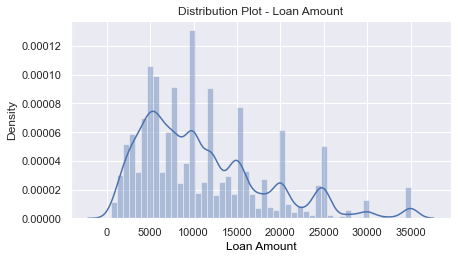

In [212]:
# Univariant Analysis on Loan Amount

#Create a Distribution Plot of the Loan Amount 

plt.figure(figsize=(15,8))
plt.subplot(2, 2, 2)
ds = sns.distplot(loan_info['loan_amnt'],kde = True)
ds.set_title('Distribution Plot - Loan Amount')
ds.set_xlabel('Loan Amount',fontsize=12,color='black')
plt.show()

# From the distribution plot below we can dedcue that most of the loans that are being taken are between 5000 - 10000

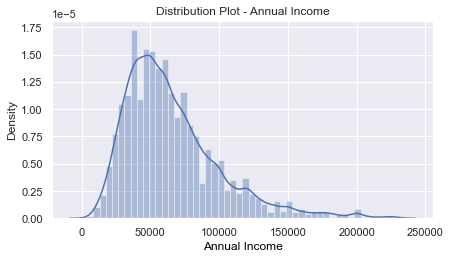

In [32]:
# Univariant Analysis on Annual Income

#Create a Distribution Plot of the Annual Income 

plt.figure(figsize=(15,8))
plt.subplot(2, 2, 2)
ds = sns.distplot(loan_info['annual_inc'],kde = True)
ds.set_title('Distribution Plot - Annual Income')
ds.set_xlabel('Annual Income',fontsize=12,color='black')
plt.show()

# From the distribution plot below we can deduce that Annual income of customers that are taking loan is around 50000 range


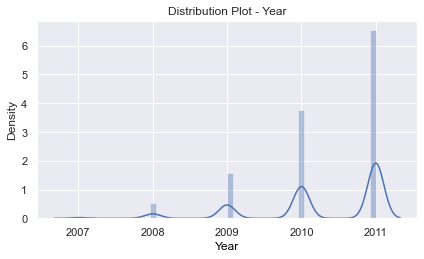

In [213]:
# Univariant Analysis on Derived metrics  - Loan Issue Year

#Create a Distribution Plot of the Laon Issue year 

sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
plt.subplot(2, 2, 1)
ds = sns.distplot(loan_info['year'],kde = True)
ds.set_title('Distribution Plot - Year')
ds.set_xlabel('Year',fontsize=12,color='black')
plt.show()

# From the distribution plot below we can deduce that Numbers of loans distributed are increasing by each year
# 2011 had the most number of loans

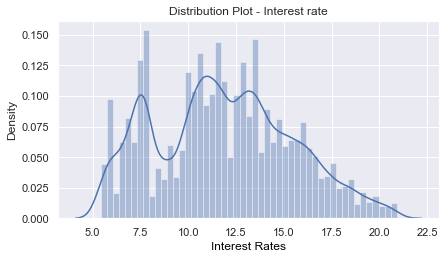

In [214]:
# Univariant Analysis on Interest Rate

#Create a Distribution Plot of the Interest Rate 

sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
plt.subplot(2, 2, 1)
ds = sns.distplot(loan_info['int_rate'],kde = True)
ds.set_title('Distribution Plot - Interest rate')
ds.set_xlabel('Interest Rates',fontsize=12,color='black')
plt.show()

# From the distribution plot below we can deduce interest rates are mostly between 10% - 15% 

In [215]:
# We will derive new variables for our analysis

# We are going to create derived cloumns for month and year columns separately that we are going to use for analysis

loan_info.issue_d = pd.to_datetime(loan_info.issue_d, format='%b-%y')
loan_info['year']=loan_info['issue_d'].dt.year
loan_info['month']=loan_info['issue_d'].dt.month

loan_info.head(50)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,desc,purpose,title,zip_code,addr_state,dti,int_rate_cats,dti_cats,year,month
0,5000,5000,4975.00000,36,10.65,162.87,B,B2,NaN,10,...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860,AZ,27.65,10-12.5,26-30,2011,12
1,2500,2500,2500.00000,60,15.27,59.83,C,C4,Ryder,1,...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309,GA,1.00,12.5-20,0-10,2011,12
2,2400,2400,2400.00000,36,15.96,84.33,C,C5,NaN,10,...,NaN,small_business,real estate business,606,IL,8.72,12.5-20,0-10,2011,12
3,10000,10000,10000.00000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917,CA,20.00,12.5-20,20-25,2011,12
5,5000,5000,5000.00000,36,7.90,156.46,A,A4,Veolia Transportaton,3,...,NaN,wedding,My wedding loan I promise to pay back,852,AZ,11.20,0-10,10-12.5,2011,12
6,7000,7000,7000.00000,60,15.96,170.08,C,C5,Southern Star Photography,8,...,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280,NC,23.51,12.5-20,26-30,2011,12
7,3000,3000,3000.00000,36,18.64,109.43,E,E1,MKC Accounting,9,...,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment,900,CA,5.35,20-25,0-10,2011,12
9,5375,5375,5350.00000,60,12.69,121.45,B,B5,Starbucks,1,...,Borrower added on 12/16/11 > I'm trying to b...,other,Building my credit history.,774,TX,18.08,12.5-20,20-25,2011,12
10,6500,6500,6500.00000,60,14.65,153.45,C,C3,Southwest Rural metro,5,...,Borrower added on 12/15/11 > I had recived a...,debt_consolidation,High intrest Consolidation,853,AZ,16.12,12.5-20,20-25,2011,12
11,12000,12000,12000.00000,36,12.69,402.54,B,B5,UCLA,10,...,NaN,debt_consolidation,Consolidation,913,CA,10.78,12.5-20,10-12.5,2011,12


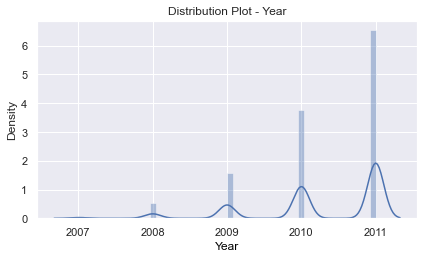

In [13]:
# Analysis on Derived column Year

#Create a Distribution Plot of the Year

sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
plt.subplot(2, 2, 1)
ds = sns.distplot(loan_info['year'],kde = True)
ds.set_title('Distribution Plot - Year')
ds.set_xlabel('Year',fontsize=12,color='black')
plt.show()

# From the distribution plot below we can deduce interest rates are mostly between 10% - 15% 

<AxesSubplot:xlabel='verification_status', ylabel='count'>

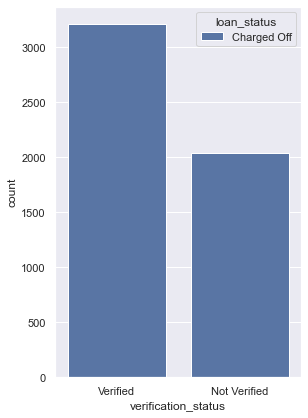

In [217]:
# For Bivariant Analysis we will focus on the loan status of "Charged Off" so that we can anlyze which variables have more impact on 
loan_info = loan_info[(loan_info['loan_status'] == 'Charged Off')]

# Bivariate Analysis on verification status against Chargedoff

sns.set(rc={'figure.figsize':(15,15)})
plt.subplot(231)
sns.countplot(x="verification_status", hue=loan_info['loan_status'], data=loan_info)

    # From the distribution plot below we can deduce that customers that were verified have very more chnaces of charge off

<AxesSubplot:xlabel='grade', ylabel='count'>

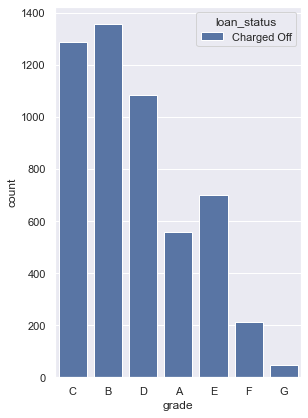

In [218]:
# loan being charged off so that we can be careful going forward in approval of application for Loan

# Bivariate Analysis on grade against Chargedoff

sns.set(rc={'figure.figsize':(15,15)})
plt.subplot(231)
sns.countplot(x="grade", hue=loan_info['loan_status'], data=loan_info)


# From the distribution plot below we can deduce that customers with grade G have very less chnaces of charge off

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

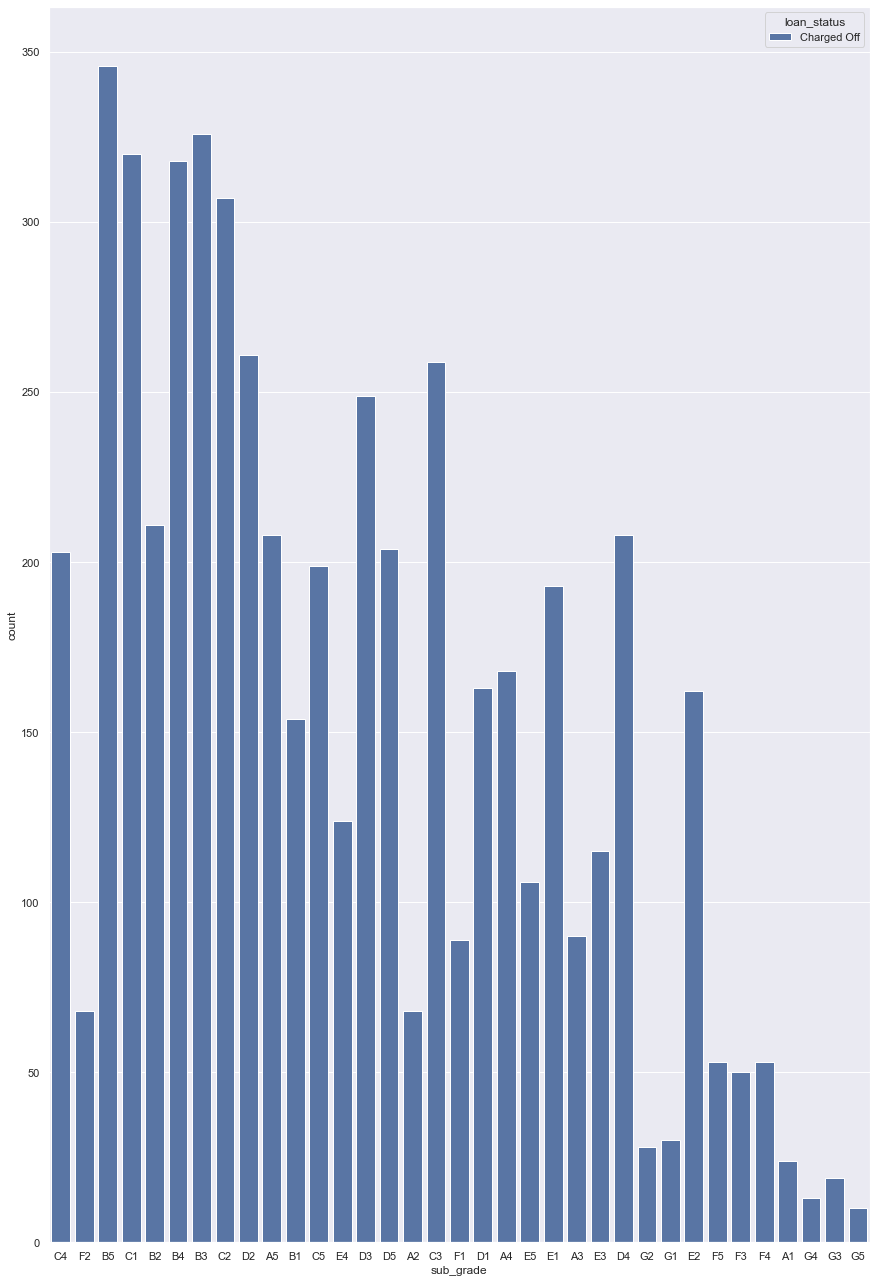

In [145]:
# Bivariate Analysis on sub grade against Chargedoff

sns.set(rc={'figure.figsize':(50,50)})
plt.subplot(231)
sns.countplot(x="sub_grade", hue=loan_info['loan_status'], data=loan_info)


# From the distribution plot below we can deduce that customers with sub grade B3, B4 and B5  have very largest chances of charge off

<AxesSubplot:xlabel='int_rate_cats', ylabel='count'>

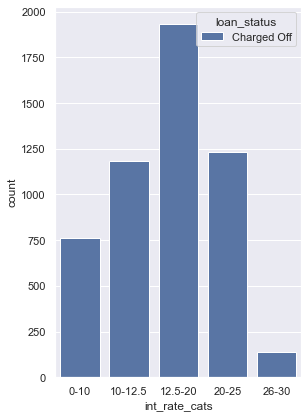

In [219]:
# Bivariate Analysis on interest rates against Chargedoff


sns.set(rc={'figure.figsize':(15,15)})
plt.subplot(231)
sns.countplot(x="int_rate_cats", hue=loan_info['loan_status'], data=loan_info)


# From the distribution plot below we can deduce that customers with interest rates between 20-25 %  have very less chances of charge off
# customers with interest rates between 12.5-16%  have very high chances of charge off

<AxesSubplot:xlabel='dti_cats', ylabel='count'>

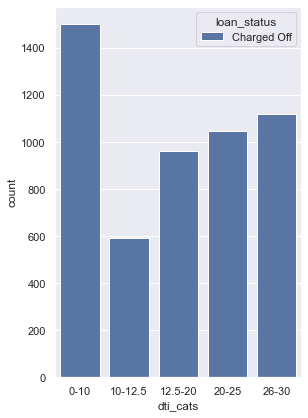

In [220]:

# Bivariate Analysis on dti against Chargedoff


sns.set(rc={'figure.figsize':(15,15)})
plt.subplot(231)
sns.countplot(x="dti_cats", hue=loan_info['loan_status'], data=loan_info)
#loan_info.to_csv('C:\\Impact\\upgrad\\exercises\\Learning Club Case Study\\data.csv')

# From the distribution plot below we can deduce that customers with dti between 0-10 %  have very high chances of charged off


<AxesSubplot:xlabel='home_ownership', ylabel='count'>

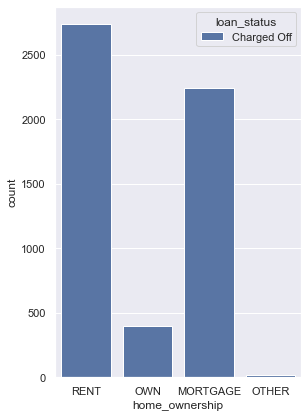

In [193]:
# Bivariate Analysis on home ownership against Chargedoff


sns.set(rc={'figure.figsize':(15,15)})
plt.subplot(231)
sns.countplot(x="home_ownership", hue=loan_info['loan_status'], data=loan_info)


# From the distribution plot below we can deduce that customers who are on rent have very more chances of charge off


<AxesSubplot:xlabel='addr_state', ylabel='count'>

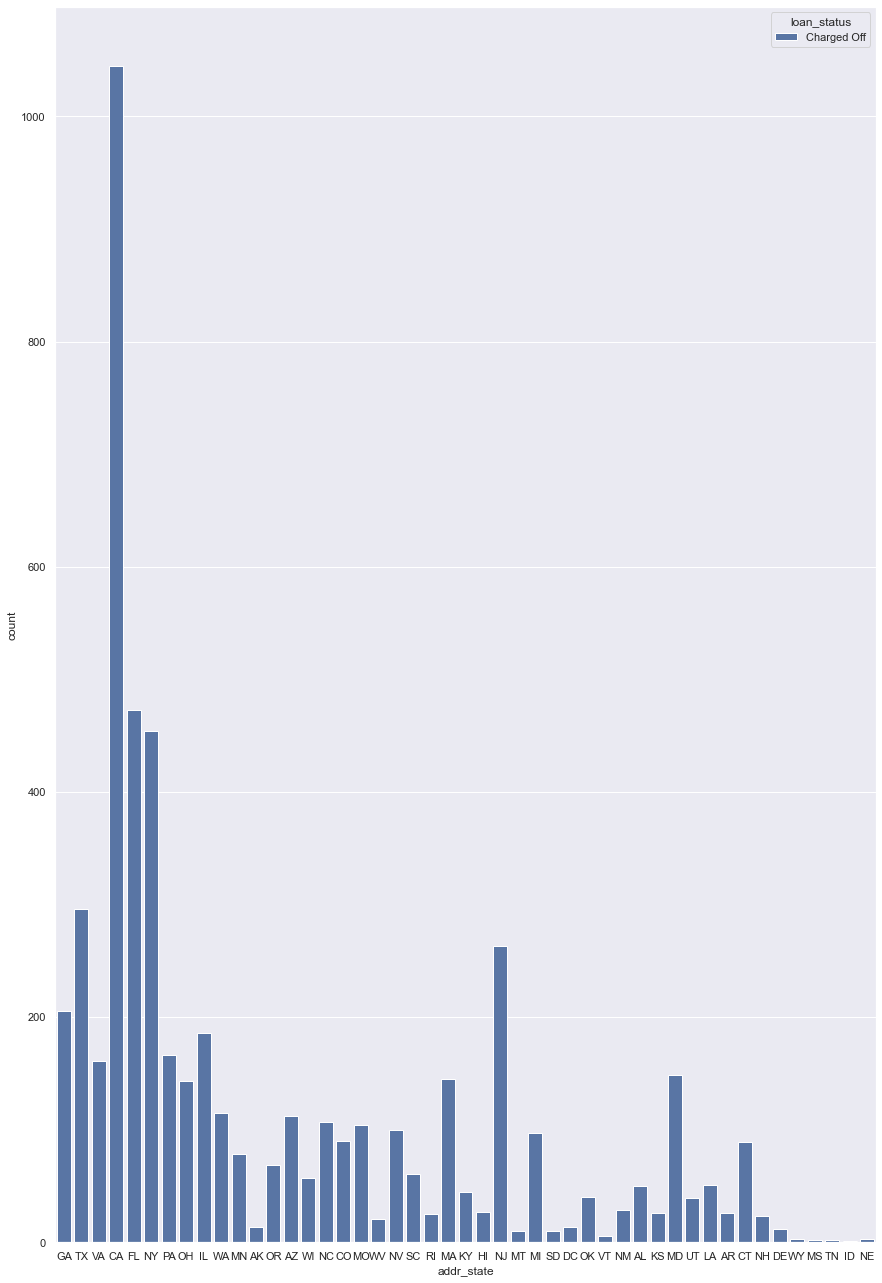

In [221]:
# Bivariate Analysis on state(address) against Chargedoff

sns.set(rc={'figure.figsize':(50,50)})
plt.subplot(231)
sns.countplot(x="addr_state", hue=loan_info['loan_status'], data=loan_info)


# From the distribution plot below we can deduce that customers from California(CA) have very more chances of charge off

In [222]:
# We are going to see how  all variables are corelated to each other
loans_correlation = loan_info.filter(["loan_amnt", "funded_amnt", "funded_amnt_inv",'int_rate','term','installment','annual_inc','dti']) 
cor = loans_correlation.corr()
round(cor, 3)



,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti
loan_amnt,1.000,0.978,0.899,0.307,0.921,0.335,0.060
funded_amnt,0.978,1.000,0.919,0.310,0.950,0.331,0.056
funded_amnt_inv,0.899,0.919,1.000,0.326,0.844,0.295,0.069
int_rate,0.307,0.310,0.326,1.000,0.281,0.102,0.049
installment,0.921,0.950,0.844,0.281,1.000,0.342,0.034
annual_inc,0.335,0.331,0.295,0.102,0.342,1.000,-0.092
dti,0.060,0.056,0.069,0.049,0.034,-0.092,1.000


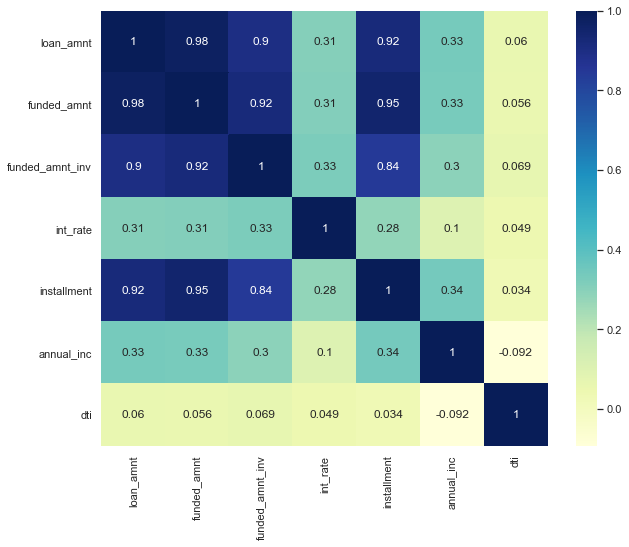

In [223]:
#Plotting Heat map to understand correlation visually
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


# From the heat map  we can deduce the following:
# Loan ammount have high correlation with Funded amount, Funded amount committed by investor and installment
# Funded amount ammount have high correlation with Loan amount, Funded amount committed by investor and installment
# Funded amount commited by investor have high correlation with Loan amount, Funded amount and installment